# Predicting Housing price 

* Here I did prediction with help of Linear Regression along with Regularization to predict the house price of the from data set 
* Before model fitting we will do the some Exploratory Data Analysis to know the data well 

### Imports  for data analysis

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# reading the csv file with help of read_csv() method
train = pd.read_csv('house-prices-advanced-regression-techniques (1)/train.csv')
test = pd.read_csv('house-prices-advanced-regression-techniques (1)/test.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# checking the test data
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
# description of the data
train.describe().T
print(len(train.columns))

81


# Data fields
### Here's a brief version of what you'll find in the data description file.

* SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass: The building class
* MSZoning: The general zoning classification
* LotFrontage: Linear feet of street connected to property
* LotArea: Lot size in square feet
* Street: Type of road access
* Alley: Type of alley access
* LotShape: General shape of property
* LandContour: Flatness of the property
* Utilities: Type of utilities available
* LotConfig: Lot configuration
* LandSlope: Slope of property
* Neighborhood: Physical locations within Ames city limits
* Condition1: Proximity to main road or railroad
* Condition2: Proximity to main road or railroad (if a second is present)
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date
* RoofStyle: Type of roof
* RoofMatl: Roof material
* Exterior1st: Exterior covering on house
* Exterior2nd: Exterior covering on house (if more than one material)
* MasVnrType: Masonry veneer type
* MasVnrArea: Masonry veneer area in square feet
* ExterQual: Exterior material quality
* ExterCond: Present condition of the material on the exterior
* Foundation: Type of foundation
* BsmtQual: Height of the basement
* BsmtCond: General condition of the basement
* BsmtExposure: Walkout or garden level basement walls
* BsmtFinType1: Quality of basement finished area
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinType2: Quality of second finished area (if present)
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical: Electrical system
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* Bedroom: Number of bedrooms above basement level
* Kitchen: Number of kitchens
* KitchenQual: Kitchen quality
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Functional: Home functionality rating
* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality
* GarageType: Garage location
* GarageYrBlt: Year garage was built
* GarageFinish: Interior finish of the garage
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* GarageQual: Garage quality
* GarageCond: Garage condition
* PavedDrive: Paved driveway
* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* PoolQC: Pool quality
* Fence: Fence quality
* MiscFeature: Miscellaneous feature not covered in other categories
* MiscVal: $Value of miscellaneous feature
* MoSold: Month Sold
* YrSold: Year Sold
* SaleType: Type of sale
* SaleCondition: Condition of sale

In [5]:
# let's find the info() about the data which will give us the datatypes 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
# let's drop those columns which have the object as data type since 
# we don't really want it to fit the model and Exploration as well
#for c in train.columns:
df_train = train.select_dtypes(exclude=['object'])
df_train.head()  

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [7]:
df_test = test.select_dtypes(exclude=['object'])
df_test.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,730.0,140,0,0,0,120,0,0,6,2010
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,312.0,393,36,0,0,0,0,12500,6,2010
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,482.0,212,34,0,0,0,0,0,3,2010
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,470.0,360,36,0,0,0,0,0,6,2010
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,506.0,0,82,0,0,144,0,0,1,2010


In [8]:
# let's find the null values present the columns

df_train.isnull().sum()
#df_test.isnull().sum()


Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [9]:
# so it is clear LotFrontage and Garageyrblt has null values
# let's drop the column LotFrontage and for GarageYrBlt let's replace Na with mean
df_train.drop('LotFrontage', inplace=True, axis=1)


/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [10]:
df_test.drop('LotFrontage', inplace=True, axis=1)

In [11]:
# let's check the null values present in test data 
df_test.isnull().sum()

Id                0
MSSubClass        0
LotArea           0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
MasVnrArea       15
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      2
BsmtHalfBath      2
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0
TotRmsAbvGrd      0
Fireplaces        0
GarageYrBlt      78
GarageCars        1
GarageArea        1
WoodDeckSF        0
OpenPorchSF       0
EnclosedPorch     0
3SsnPorch         0
ScreenPorch       0
PoolArea          0
MiscVal           0
MoSold            0
YrSold            0
dtype: int64

In [12]:
df_test.dropna(axis=0, inplace=True)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
df_train.dropna(axis=0, inplace=True)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
print(df_train.shape)
print(df_test.shape)

(1371, 37)
(1365, 36)


In [15]:
for col in df_train.columns:
    if col not in df_test.columns:
        print(col)

SalePrice


### As we don't have missing value we are ready to some exploration and visualizations 

In [16]:
# hist for checking the frequ of the dataset

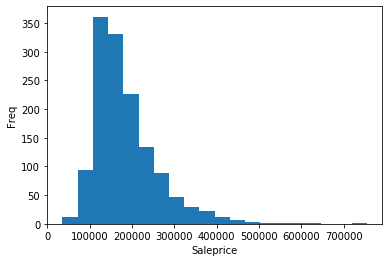

In [17]:
plt.hist(df_train['SalePrice'], bins=20)
plt.xlabel('Saleprice')
plt.ylabel('Freq')
plt.show()


The graph is right skewed and let's try to take it's log 


### salesprice data is right skewed 

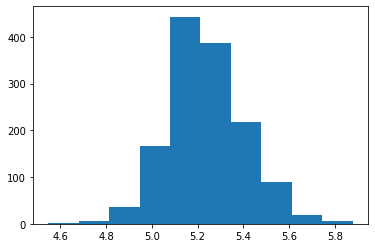

In [18]:
plt.hist(np.log10(df_train['SalePrice']), bins=10)
plt.show()

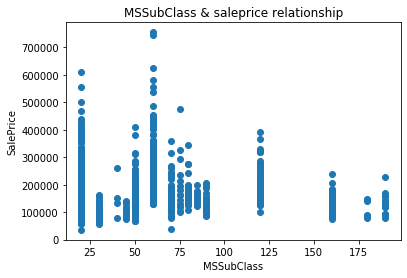

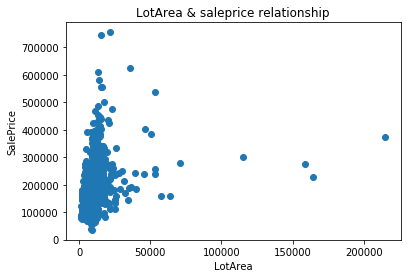

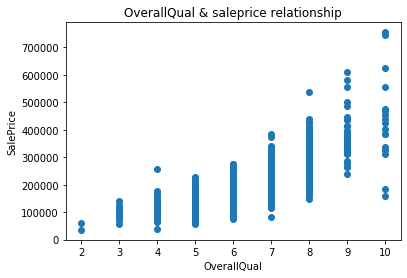

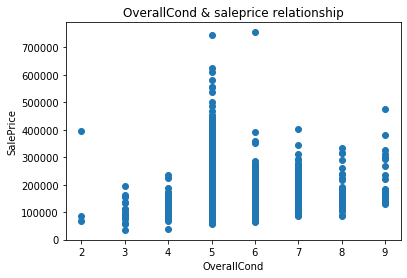

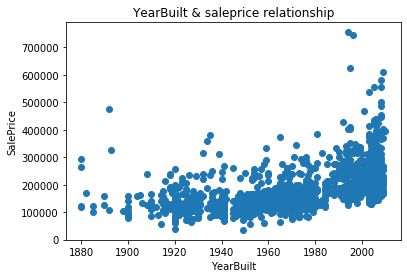

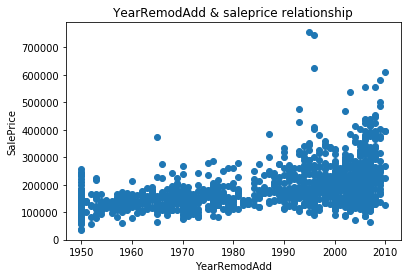

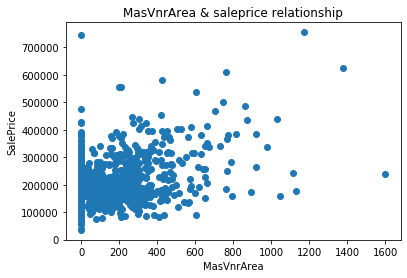

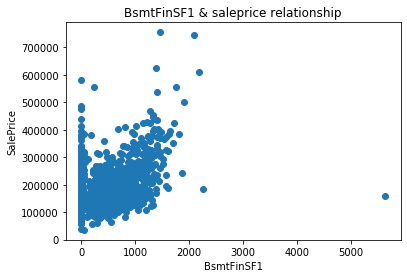

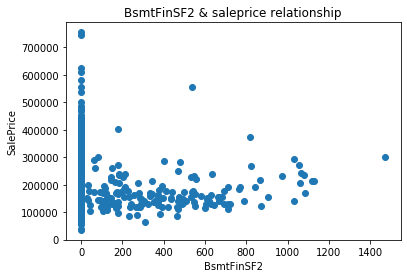

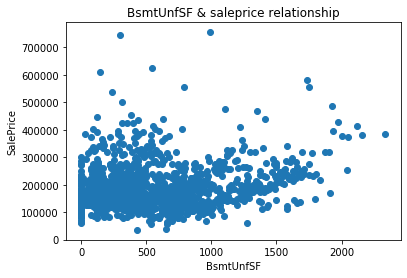

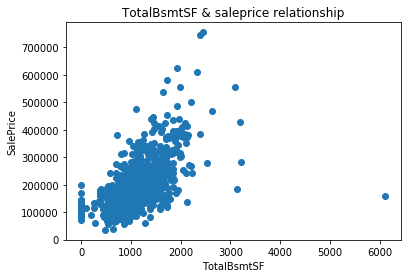

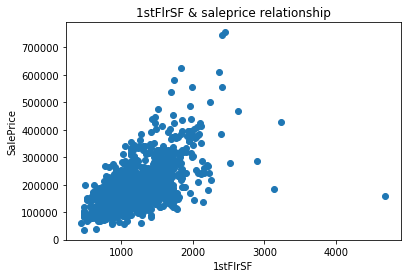

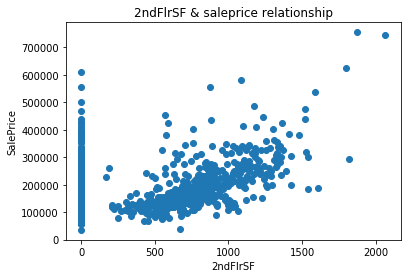

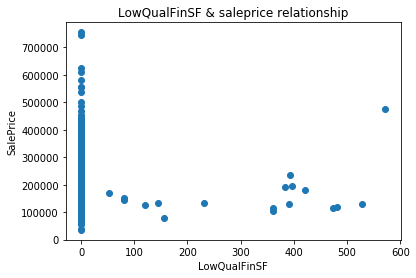

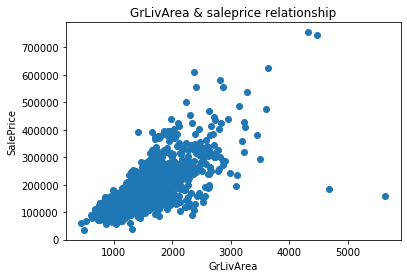

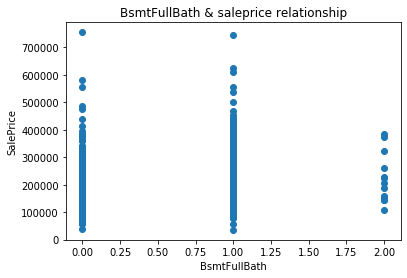

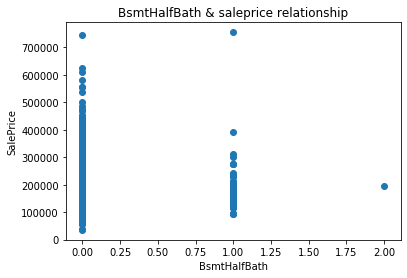

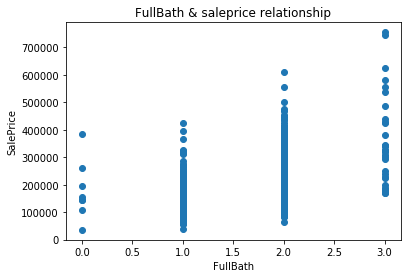

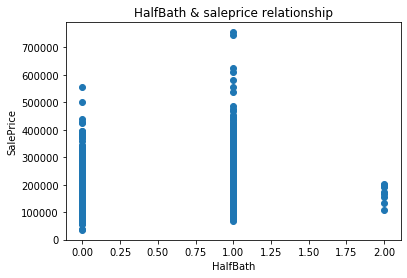

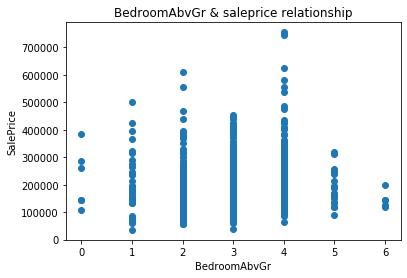

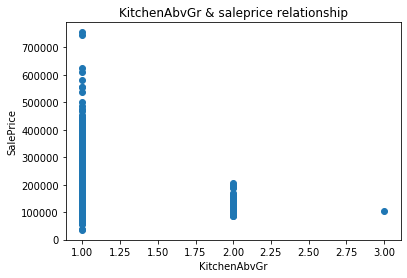

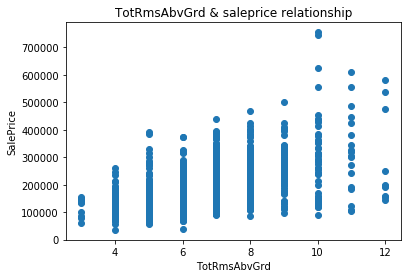

In [ ]:
# let'plot scatter plot to check the relation of target variable with other columns in the train set
cols = df_train.loc[:,'MSSubClass': 'YrSold']
for c in cols.columns:
    plt.scatter(df_train[c], df_train['SalePrice'])
    plt.xlabel(c)
    plt.ylabel('SalePrice')
    plt.title(c+' & saleprice relationship')
    plt.show()

### Linear or Partially linear relationship: 
* LotArea
* yearBuilt
* yearRemodAdd
* BSMtFinSF1
* 1stFlrSF
* GrLivArea
* GarageYrBlt
* GarageArea
* WoodDeckSF


rest are non-linear.

In [ ]:
# let's plot the correlations between the variable 
corr = df_train.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr)

Heatmap correlation gave the little intuition about the correlation between the variables

### let's do the boxplot to check the outliers present in the variable

In [ ]:
cols = df_train.loc[:,'MSSubClass': ]
for c in cols.columns:
    sns.boxplot(df_train[c])
    plt.xlabel(c)
    plt.ylabel('SalePrice')
    plt.title(c+' & saleprice relationship')
    plt.show()

from the Box plots of the Housing price dataset it is clear the some variables do have the outliers and we have to deal with them

In [ ]:
from scipy import stats
idx = np.all(stats.zscore(df_train) < 3, axis=1)

In [ ]:
df_cleaned = df_train[idx]
cols = df_cleaned.loc[:,'MSSubClass': ]
for c in cols.columns:
    sns.boxplot(df_cleaned[c])
    plt.xlabel(c)
    plt.ylabel('SalePrice')
    plt.title(c+' & saleprice relationship')
    plt.show()

In [ ]:
print('data with outliers',df_train.shape)
print('cleaned data',df_cleaned.shape)

## let's split the test, train dataset

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_cleaned.loc[:,'MSSubClass':'YrSold'], df_cleaned.SalePrice, test_size=0.2, random_state=101)

## let's get the linear model instance from sklearn.linear_model

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# let's create the instance of LinearRegression
regressor = LinearRegression()

#fit the model 
regressor.fit(X_train, y_train)

#predict 

y_pred = regressor.predict(X_test)


In [ ]:
r2 = regressor.score(X_train, y_train)

In [ ]:
n = df_cleaned.shape[0]
p = len(X_train.columns)
Adjr2 = 1- (1-r2)*((n-1)/(n-p-1))
print('R_Square\t',r2)
print('AdjustedR_Square',Adjr2)
fstat = (r2/(1-r2))*((n-p-1)/p)
print('F-statistics\t',fstat)

## let's do forward selection of the feature

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
def forward_selection(data, target, significance_level=0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [ ]:
ff_selected = forward_selection(X_train, y_train)
print(ff_selected)


##### according the forward feature selection these are the best features

In [ ]:
regressor.fit(X_train[ff_selected], y_train)
y_pred = regressor.predict(X_test[ff_selected])

In [ ]:
r2 = regressor.score(X_train[ff_selected], y_train)
n = df_cleaned.shape[0]
p = len(X_train[ff_selected].columns)
Adjr2 = 1- (1-r2)*((n-1)/(n-p-1))
print('R_Square\t',r2)
print('AdjustedR_Square',Adjr2)
fstat = (r2/(1-r2))*((n-p-1)/p)
print('F-statistics\t',fstat)

So the results are clear after doing the forward Feature selection Rsquare value and AdjustedRsquare value are did not change but the F-stat changed by 200 units which gave the confirmation that the features which are selected by us are increasing the prediction.

### Trying  Regularization to fit model

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [ ]:
#print(X_train)
ridge = Ridge()
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
r2 = ridge.score(X_train, y_train)

In [ ]:
n = df_cleaned.shape[0]
p = len(X_train.columns)
Adjr2 = 1- (1-r2)*((n-1)/(n-p-1))
print('R_Square\t',r2)
print('AdjustedR_Square',Adjr2)
fstat = (r2/(1-r2))*((n-p-1)/p)
print('F-statistics\t',fstat)

In [ ]:
# for feature selected 
ridge.fit(X_train[ff_selected], y_train)
y_pred = ridge.predict(X_test[ff_selected])
r2 = ridge.score(X_train[ff_selected], y_train)
n = df_cleaned.shape[0]
p = len(X_train.columns)
Adjr2 = 1- (1-r2)*((n-1)/(n-p-1))
print('R_Square\t',r2)
print('AdjustedR_Square',Adjr2)
fstat = (r2/(1-r2))*((n-p-1)/p)
print('F-statistics\t',fstat)

In [ ]:
alpha1 = [1,10,100,0.1,0.01,.001, 0.0001]
for a in alpha1:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train[ff_selected], y_train)
    r2 = ridge.score(X_train[ff_selected], y_train)
    y_pred = ridge.predict(X_test[ff_selected])
    n = df_cleaned[ff_selected].shape[0]
    p = len(X_train.columns)
    Adjr2 = 1- (1-r2)*((n-1)/(n-p-1))
    print('Value for alpha',a)
    print('R_Square\t',r2)
    print('AdjustedR_Square',Adjr2)
    fstat = (r2/(1-r2))*((n-p-1)/p)
    print('F-statistics\t',fstat,'\n')
    
    

In [ ]:
# let's do for Lasso 
alpha1 = [1,10,100,0.1,0.01,.001, 0.0001]
for a in alpha1:
    lasso = Lasso(alpha=a, max_iter=10e5)
    lasso.fit(X_train[ff_selected], y_train)
    y_pred = lasso.predict(X_test[ff_selected])
    r2 = lasso.score(X_train[ff_selected], y_train)
    n = df_cleaned.shape[0]
    p = len(X_train.columns)
    Adjr2 = 1- (1-r2)*((n-1)/(n-p-1))
    print('Value for alpha',a)
    print('R_Square\t',r2)
    print('AdjustedR_Square',Adjr2)
    fstat = (r2/(1-r2))*((n-p-1)/p)
    print('F-statistics\t',fstat,'\n')

In [ ]:
# let's do for Lasso 
alpha1 = [1,10,100,0.1,0.01,.001, 0.0001]
for a in alpha1:
    lasso = Lasso(alpha=a, max_iter=10e5)
    lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_test)
    r2 = lasso.score(X_train, y_train)
    n = df_cleaned.shape[0]
    p = len(X_train.columns)
    Adjr2 = 1- (1-r2)*((n-1)/(n-p-1))
    print('Value for alpha',a)
    print('R_Square\t',r2)
    print('AdjustedR_Square',Adjr2)
    fstat = (r2/(1-r2))*((n-p-1)/p)
    print('F-statistics\t',fstat,'\n')

In [ ]:
alpha1 = [1,10,100,0.1,0.01,.001, 0.0001]
for a in alpha1:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train, y_train)
    r2 = ridge.score(X_train, y_train)
    y_pred = ridge.predict(X_test)
    n = df_cleaned[ff_selected].shape[0]
    p = len(X_train.columns)
    Adjr2 = 1- (1-r2)*((n-1)/(n-p-1))
    print('Value for alpha',a)
    print('R_Square\t',r2)
    print('AdjustedR_Square',Adjr2)
    fstat = (r2/(1-r2))*((n-p-1)/p)
    print('F-statistics\t',fstat,'\n')